In [1]:
%matplotlib inline
import numpy as np
from frequencyoptimizer import *

In [2]:
galnoise = GalacticNoise()
telnoise = TelescopeNoise(gain=2.0,T_rx=30)

In [3]:
NCHAN = 20 #number of channels (in log frequency) to break up the band into to build covariance matrices
NSTEPS = 20
LEVELS = np.array([np.log10(0.5),np.log10(1.0),np.log10(2.0),np.log10(5.0),np.log10(10.0)])

Computing for pulsar: J1744-1134
Computing center freq 0.100 GHz (0/41)
Computing center freq 0.112 GHz (1/41)
Computing center freq 0.126 GHz (2/41)
Computing center freq 0.141 GHz (3/41)
Computing center freq 0.158 GHz (4/41)
Computing center freq 0.178 GHz (5/41)
Computing center freq 0.200 GHz (6/41)
Computing center freq 0.224 GHz (7/41)
Computing center freq 0.251 GHz (8/41)
Computing center freq 0.282 GHz (9/41)
Computing center freq 0.316 GHz (10/41)
Computing center freq 0.355 GHz (11/41)
Computing center freq 0.398 GHz (12/41)
Computing center freq 0.447 GHz (13/41)
Computing center freq 0.501 GHz (14/41)
Computing center freq 0.562 GHz (15/41)
Computing center freq 0.631 GHz (16/41)
Computing center freq 0.708 GHz (17/41)
Computing center freq 0.794 GHz (18/41)
Computing center freq 0.891 GHz (19/41)
Computing center freq 1.000 GHz (20/41)
Computing center freq 1.122 GHz (21/41)
Computing center freq 1.259 GHz (22/41)
Computing center freq 1.413 GHz (23/41)
Computing center 

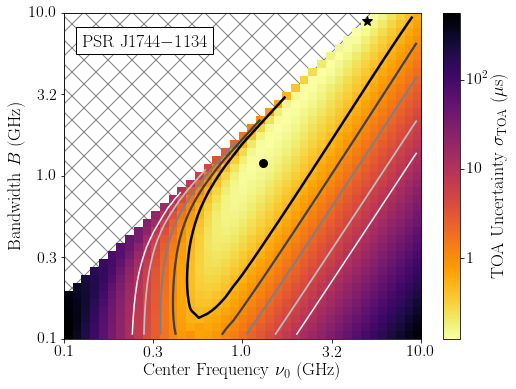

In [4]:
psrnoise = PulsarNoise("J1744-1134",alpha=1.49,taud=26.1e-3,I_0=4.888,DM=3.14,D=0.41,tauvar=12.2e-3,dtd=1272.2,Weffs=np.zeros(NCHAN)+511.0,W50s=np.zeros(NCHAN)+136.8,sigma_Js=np.zeros(NCHAN)+0.066,P=4.074545941439190,Uscale=27.01)  #jitter upper limit

freqopt = FrequencyOptimizer(psrnoise,galnoise,telnoise,numin=0.1,numax=10.0,nchan=NCHAN,log=True,nsteps=NSTEPS,levels=LEVELS)
freqopt.calc()
freqopt.plot(doshow=True,save=False,minimum='k*',points=(1.3,1.2,'ko'))

In [5]:
# Look at individual TOA uncertainty contributions

NCHAN = 100 #Increase resolution to avoid inversion of singular matrix of scintillation noise component.
psrnoise = PulsarNoise("J1744-1134",alpha=1.49,taud=26.1e-3,I_0=4.888,DM=3.14,D=0.41,tauvar=12.2e-3,dtd=1272.2,Weffs=np.zeros(NCHAN)+511.0,W50s=np.zeros(NCHAN)+136.8,sigma_Js=np.zeros(NCHAN)+0.066,P=4.074545941439190,Uscale=27.01)  #jitter upper limit

freqopt = FrequencyOptimizer(psrnoise,galnoise,telnoise,numin=0.1,numax=10.0,nchan=NCHAN,log=True,nsteps=NSTEPS,levels=LEVELS)

freqopt.vverbose = True # can be supplied directly as an argument above
nulow = 1.1 #GHz
nuhigh = 2.5
nus = np.linspace(nulow,nuhigh,NCHAN+1)[:-1]

freqopt.calc_single(nus)

White noise: 0.085 us
   Template-fitting error: 0.053 us
   Jitter error: 0.066 us
   Scintillation error: -0.000 us
DM misestimation noise: 0.160 us
   DM estimation error: 0.160 us
   DM(nu) error: 0.000 us
   Chromatic term error: 0.003 us
Telescope noise: 0.033 us
Total noise: 0.184 us



0.18404136994122872